# Autonomous Ex.:

Find a numerical approximation for $$\frac{dy}{dt}=2y-1\qquad y(0)=1$$

The specific solution to this equation is $$y(t)=\frac{e^{2t}+1}{2}$$

given $f(t,y)=2y-1$ Eulers method is given by $y_{k+1}=y_k+(2y_k-1)\Delta t$

We are given the initial condition for this problem -> $y(t_{k_0})=y_{k_0}=1$

if we take small steps of $\Delta t$ we can avoid errors from creeping in too quickly

      y_k    t_k f(y,t) Actual
0   1.000  0.000  1.000  1.000
1   1.050  0.050  1.100  1.053
2   1.105  0.100  1.210  1.111
3   1.165  0.150  1.331  1.175
4   1.232  0.200  1.464  1.246
5   1.305  0.250  1.611  1.324
6   1.386  0.300  1.772  1.411
7   1.474  0.350  1.949  1.507
8   1.572  0.400  2.144  1.613
9   1.679  0.450  2.358  1.730
10  1.797  0.500  2.594  1.859
11  1.927  0.550  2.853  2.002
12  2.069  0.600  3.138  2.160
13  2.226  0.650  3.452  2.335
14  2.399  0.700  3.797  2.528
15  2.589  0.750  4.177  2.741
16  2.797  0.800  4.595  2.977
17  3.027  0.850  5.054  3.237
18  3.280  0.900  5.560  3.525
19  3.558  0.950  6.116  3.843
20  3.864  1.000  6.727  4.195


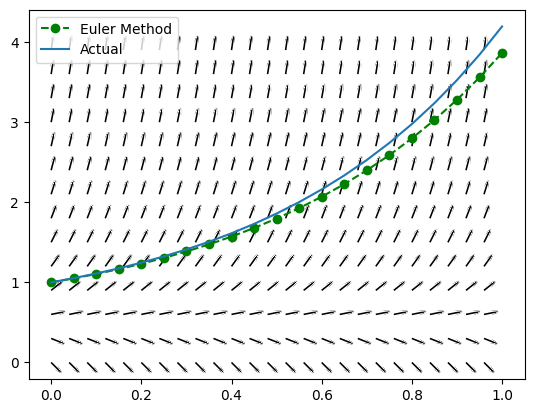

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

slopet=np.arange(0,1,0.04)
slopey=np.arange(0,4,0.3)

ts, ys=np.meshgrid(slopet, slopey)

def norm(dt, dy):
    return np.sqrt(dt**2+dy**2)
def ex_1(y):
    return (2*y-1)

def ex_1_sol(t):
    return (np.exp(2*t)+1)/2

dy=ex_1(ys)
dt=np.ones(dy.shape)
n=norm(dt, dy)

time=np.linspace(0,1,21)
y=1 # Initial condition at y(0)
yk=[]
tim=[]
func=[]
for t in time:
    yk.append(y)
    tim.append(t)
    func.append(ex_1(y))
    y=y+ex_1(y)*0.05

plt.quiver(ts, ys, dt/n, dy/n, headaxislength=0)
plt.plot(tim, yk, 'og', linestyle='dashed', label='Euler Method')
plt.plot(time, ex_1_sol(time), label='Actual')
plt.legend()

yk=["{:.3f}".format(x) for x in yk]
tim=["{:.3f}".format(x) for x in tim]
func=["{:.3f}".format(x) for x in func]
actual=["{:.3f}".format(ex_1_sol(t)) for t in time]
data=pd.DataFrame({'y_k':yk, 't_k':tim, 'f(y,t)':func, 'Actual':actual})
data.to_csv('data10.csv', index=False)
print(data)

We could make this even more accurate by making $\Delta t$ even smaller

          y_k   t_k    f(t,y) Actual
0    1.000000  0.00  1.000000  1.000
1    1.010000  0.01  1.020000  1.010
2    1.020200  0.02  1.040400  1.020
3    1.030604  0.03  1.061208  1.031
4    1.041216  0.04  1.082432  1.042
..        ...   ...       ...    ...
96   3.846467  0.96  6.692933  3.910
97   3.913396  0.97  6.826792  3.979
98   3.981664  0.98  6.963328  4.050
99   4.051297  0.99  7.102594  4.121
100  4.122323  1.00  7.244646  4.195

[101 rows x 4 columns]


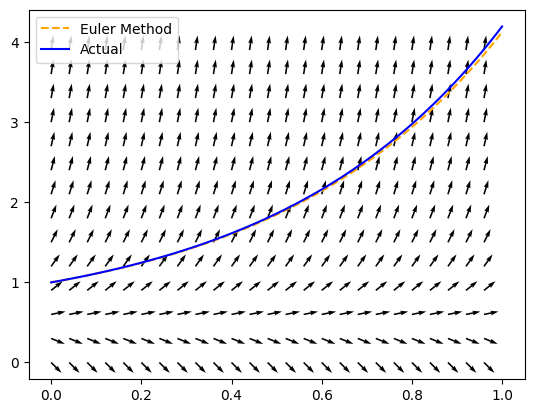

In [2]:
time=np.linspace(0, 1, 101)
y=1
yk=[]
tim=[]
func=[]
for t in time:
   yk.append(y)
   tim.append(t)
   func.append(ex_1(y))
   y=y+ex_1(y)*0.01

plt.quiver(ts, ys, dt/n, dy/n)
plt.plot(tim, yk, linestyle='dashed', label='Euler Method', color='orange')
plt.plot(time, ex_1_sol(time), label='Actual', color='blue')
plt.legend()
actual=["{:.3f}".format(ex_1_sol(t)) for t in time]
data101=pd.DataFrame({'y_k':yk, 't_k':tim, 'f(t,y)':func, 'Actual':actual})
data101.to_csv('data101.csv', index=False)
print(data101)

# Non Autonomous Example:

In the previous example, $f(t, y)$ was only dependent on $y$. However, if $f(t,y)$ is also dependent on t, we must accomidate that issue as well

Take $$\frac{dy}{dt}=-2ty^2\qquad y(0)=1$$

and use Eulers Method to approximate the solution:$$y(t)=\frac{1}{1+t^2}$$

## Answer

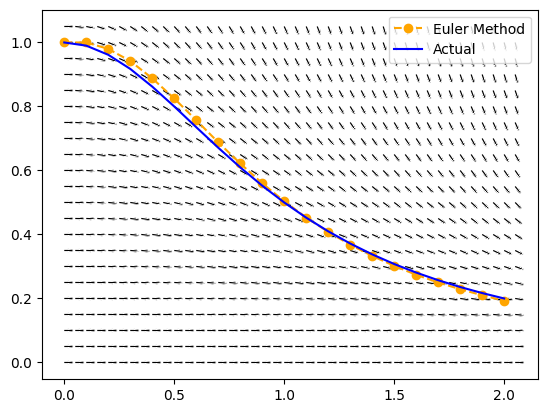

In [37]:
def ex_2(y, t):
    return -(2*t*y**2)
def ex_2_sol(t):
    return (1)/(1+t**2)

st=np.arange(0,2.1, 0.05)
sy=np.arange(0,1.1,0.05)
ts, ys=np.meshgrid(st, sy)

time=np.linspace(0,2,21)
dy=ex_2(ys,ts)
dt=np.ones(dy.shape)
n=norm(dt, dy)

plt.quiver(ts, ys, dt/n, dy/n, headaxislength=0)

y=1
yk=[]
tim=[]
func=[]
for t in time:
    yk.append(round(y,3))
    tim.append(round(t, 3))
    func.append(round(ex_2(y, t),3))
    y=y+ex_2(y, t)*0.1        

plt.plot(tim, yk, 'o', linestyle='dashed', color='orange', label='Euler Method')
plt.plot(time, ex_2_sol(time), color='blue', label='Actual')
plt.legend()
actual=[round(ex_2_sol(t), 3) for t in time]
data=pd.DataFrame({'y':yk, 't':tim, 'f(t,y)':func, 'Actual':actual})
data.to_csv('ex2_data.csv', index=False)

# RC Circuit With Periodic Input(Revisited)

Recall what we were doing with circuits: $$\frac{dv_c}{dt}=\frac{V(t)-v_c}{RC}$$

if we let $R=0.5$ and $C=1$ the differential becomes $$2(V(t)-v_c)$$

Suppose the Voltage source varies $V(t)=\sin{2\pi t}$ then our differential is $$\frac{dv_c}{dt}=2\sin{(2\pi t)}-2v_c$$

First generate a slope field for the given information, then using Eulers Method, estimate and plot a solution for initial conditions $v_c(0)=1,\ v_c(0)=0,\ v_c(0)=-1$

## Answer

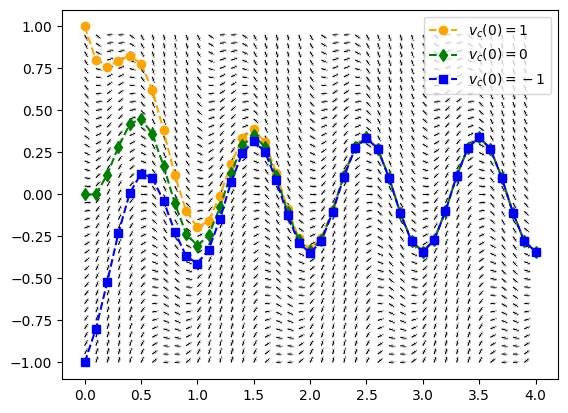

In [52]:
st=np.arange(0, 4, 0.1)
sv=np.arange(-1, 1, 0.05)

ts, vs=np.meshgrid(st, sv)

def rc_period(t, v):
    return (2*np.sin(2*np.pi*t)-2*v)

dv=rc_period(ts, vs)
dt=np.ones(dv.shape)
n=norm(dt, dv)

plt.quiver(ts, vs, dt/n, dv/n, headaxislength=0)

vc=[1, 0, -1]

v1=[]
v2=[]
v3=[]
time=np.linspace(0, 4, 41)
tim=[]


for t in time:
    tim.append(round(t, 3))
    v1.append(round(vc[0], 3))
    v2.append(round(vc[1], 3))
    v3.append(round(vc[2], 3))
    vc[0]=vc[0]+rc_period(t, vc[0])*0.1
    vc[1]=vc[1]+rc_period(t, vc[1])*0.1
    vc[2]=vc[2]+rc_period(t, vc[2])*0.1

plt.plot(tim, v1, 'o', linestyle='dashed', label=r'$v_c(0)=1$', color='orange')
plt.plot(tim, v2, 'd', label=r'$v_c(0)=0$', color='green', ls='--')
plt.plot(tim, v3, 's', color='blue', label=r'$v_c(0)=-1$', ls='--')
plt.legend()

data=pd.DataFrame({'t':tim,'v(0)=1':v1, 'v(0)=0':v2, 'v(0)=-1':v3})
data.to_csv('rc_period_data.csv', index=False)